In [236]:
%%capture
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn


In [237]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [238]:
with open('./data/dreps_data.json', 'r') as file:
    data = json.load(file)
    df = pd.DataFrame(data["rows"])
df['live_stake'] = pd.to_numeric(df['live_stake'], errors='coerce') / 1_000_000
print(df["live_stake"].tail())
print(df.columns)

926    0.0
927    0.0
928    0.0
929    0.0
930    0.0
Name: live_stake, dtype: float64
Index(['hash', 'bech32_legacy', 'has_script', 'tx_hash', 'url', 'comment',
       'payment_address', 'given_name', 'objectives', 'motivations',
       'qualifications', 'image', 'live_stake', 'delegator', 'tx_time',
       'last_active_epoch', 'bech32'],
      dtype='object')


In [239]:
def calculate_data_for_lorenz(df,column:str):
    # Convert 'live_stake' to numeric (in case it's a string)
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

    # Sort the values in ascending order
    sorted_stake = np.sort(df[column].values)

    # Calculate cumulative share of stake
    cumulative_stake = np.cumsum(sorted_stake)
    cumulative_stake_share = cumulative_stake / cumulative_stake[-1]  # normalize to 1

    # Calculate cumulative share of entities (e.g., voters or delegators)
    n = len(sorted_stake)
    cumulative_entities = np.arange(1, n + 1) / n
    return cumulative_entities, cumulative_stake_share
    

In [240]:
kneset_data = [32,24,14,12,11,7,6,5,5,4]
df_knestet = pd.DataFrame(kneset_data, columns=["seats"])


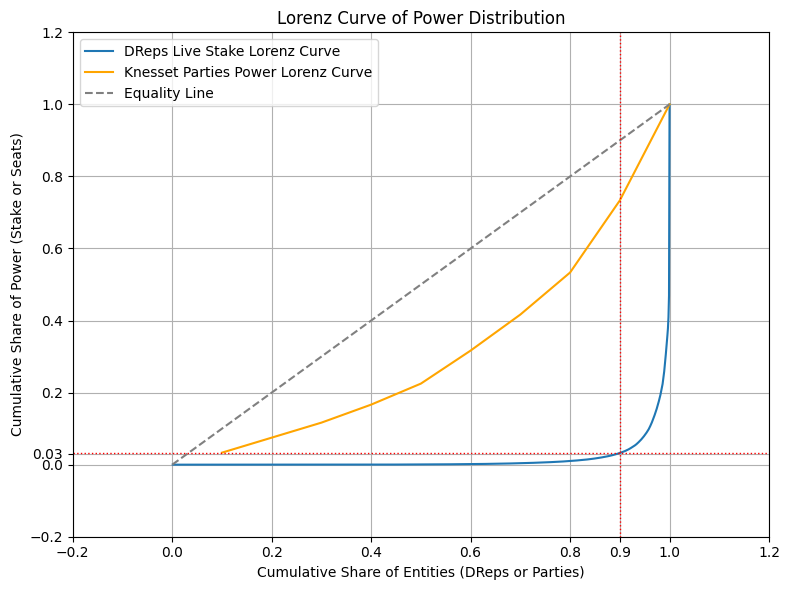

In [241]:

# Calculate Lorenz data
cumulative_entities_drep_live_stake, cumulative_stake_share_drep_live_stake = calculate_data_for_lorenz(df, "live_stake")
cumulative_entities_kneset, cumulative_stake_share_kneset = calculate_data_for_lorenz(df_knestet, "seats")

# Calculate DRep top 10% power
live_stakes = pd.to_numeric(df['live_stake'], errors='coerce').fillna(0).sort_values().values
total_stake = live_stakes.sum()
cutoff_10 = int(len(live_stakes) * 0.9)
top_10_power = live_stakes[cutoff_10:].sum() / total_stake

# Plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_entities_drep_live_stake, cumulative_stake_share_drep_live_stake,
         label='DReps Live Stake Lorenz Curve')
plt.plot(cumulative_entities_kneset, cumulative_stake_share_kneset,
         label='Knesset Parties Power Lorenz Curve', color='orange')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Equality Line')

# Add 10% vertical and horizontal insight lines
plt.axvline(0.9, color='red', linestyle=':', linewidth=1)
plt.axhline(1 - top_10_power, color='red', linestyle=':', linewidth=1)

# Add tick labels at those points without removing default ticks
xticks, xticklabels = plt.xticks()
yticks, yticklabels = plt.yticks()

# Add 90% to x-axis ticks
if 0.9 not in xticks:
    xticks = np.append(xticks, 0.9)
    xticklabels = list(xticklabels) + ['0.9']

# Add corresponding y-axis label
rounded_y = round(1 - top_10_power, 2)
if rounded_y not in yticks:
    yticks = np.append(yticks, rounded_y)
    yticklabels = list(yticklabels) + [f'{rounded_y}']

plt.xticks(xticks, xticklabels)
plt.yticks(yticks, yticklabels)

# Final plot setup
plt.title("Lorenz Curve of Power Distribution")
plt.xlabel("Cumulative Share of Entities (DReps or Parties)")
plt.ylabel("Cumulative Share of Power (Stake or Seats)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('lurenz_curve.pdf')
plt.show()

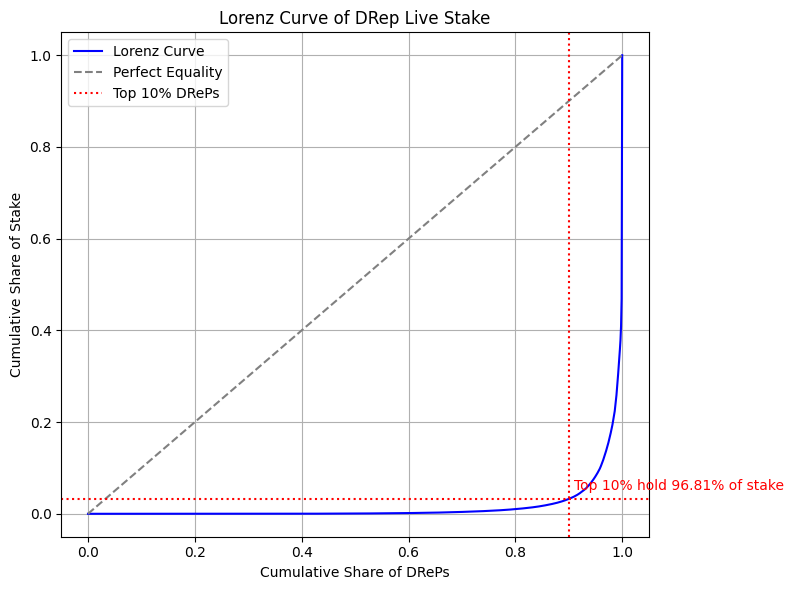

In [242]:
# Make sure live_stake is numeric and drop NaNs
df['live_stake'] = pd.to_numeric(df['live_stake'], errors='coerce').fillna(0)
stakes = df['live_stake'].sort_values().values

# Normalize the values
cumulative_stake = np.cumsum(stakes)
total_stake = cumulative_stake[-1]
lorenz_y = cumulative_stake / total_stake
lorenz_x = np.linspace(0, 1, len(stakes))

# Plot Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(lorenz_x, lorenz_y, label="Lorenz Curve", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfect Equality")

# Compute top 10% power share
top_10_cutoff_index = int(len(stakes) * 0.9)
power_top_10_percent = stakes[top_10_cutoff_index:].sum() / total_stake

# Annotate it
plt.axvline(0.9, color='red', linestyle=':', label='Top 10% DRePs')
plt.axhline(1 - power_top_10_percent, color='red', linestyle=':')
plt.text(0.91, 1 - power_top_10_percent + 0.02,
         f"Top 10% hold {power_top_10_percent:.2%} of stake",
         color='red')

# Labels and legend
plt.title("Lorenz Curve of DRep Live Stake")
plt.xlabel("Cumulative Share of DRePs")
plt.ylabel("Cumulative Share of Stake")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

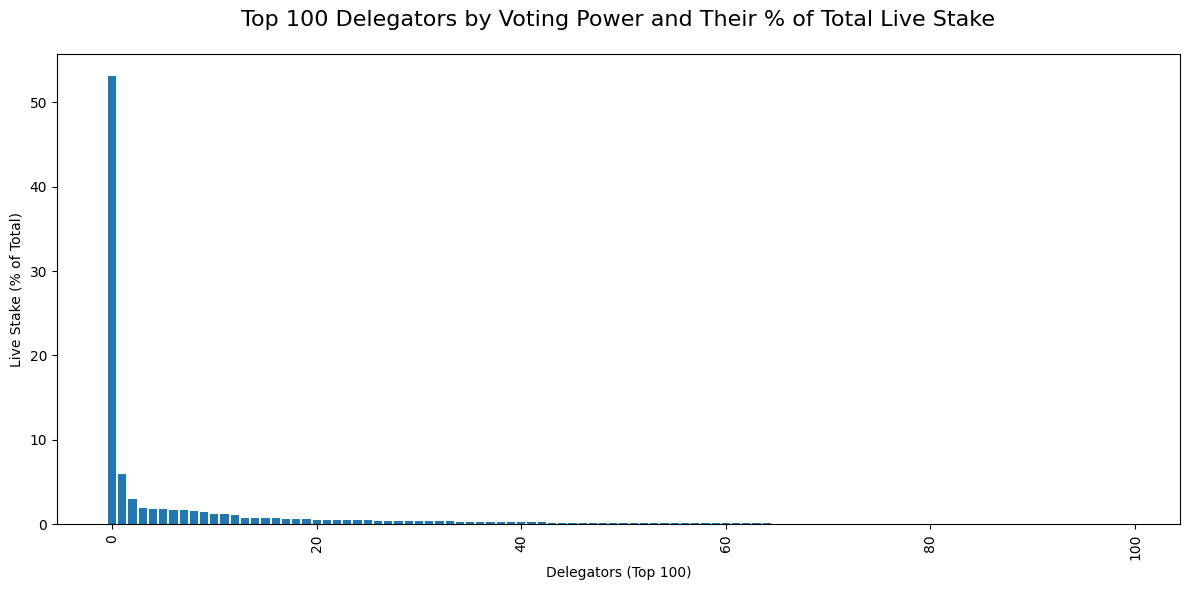

In [243]:
# Sort and select top 100
top_df = df.sort_values('live_stake', ascending=False).head(100)

# Compute percentage of total stake
total_stake = df['live_stake'].sum()
top_df['stake_pct'] = top_df['live_stake'] / total_stake * 100

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(100), top_df['stake_pct'])
plt.xticks(rotation=90)
plt.title("Top 100 Delegators by Voting Power and Their % of Total Live Stake", fontsize=16, pad=20)
plt.ylabel("Live Stake (% of Total)")
plt.xlabel("Delegators (Top 100)")
plt.tight_layout()
plt.savefig("top_100_delegators.pdf")
plt.show()

In [244]:
participation_list = "83.33%50.00%83.33%33.33%83.33%66.67%60.00%50.00%83.33%83.33%83.33%50.00%100.00%83.33%50.00%83.33%83.33%66.67%66.67%33.33%66.67%100.00%100.00%83.33%83.33%100.00%50.00%83.33%83.33%83.33%100.00%33.33%16.67%100.00%83.33%100.00%33.33%66.67%50.00%100.00%83.33%66.67%66.67%83.33%83.33%100.00%83.33%83.33%66.67%83.33%100.00%16.67%83.33%66.67%83.33%66.67%100.00%83.33%50.00%83.33%83.33%83.33%33.33%83.33%16.67%50.00%83.33%100.00%0.00%0.00%0.00%100.00%100.00%50.00%83.33%50.00%83.33%66.67%83.33%50.00%83.33%66.67%50.00%0.00%83.33%100.00%83.33%0.00%66.67%83.33%100.00%100.00%16.67%100.00%83.33%33.33%33.33%66.67%83.33%66.67%100.00%33.33%33.33%83.33%100.00%83.33%66.67%100.00%83.33%50.00%100.00%16.67%83.33%100.00%100.00%50.00%66.67%50.00%50.00%16.67%100.00%83.33%83.33%50.00%50.00%66.67%33.33%83.33%66.67%83.33%50.00%83.33%16.67%16.67%66.67%83.33%100.00%50.00%83.33%83.33%66.67%66.67%66.67%33.33%83.33%16.67%50.00%100.00%33.33%83.33%83.33%16.67%33.33%0.00%50.00%33.33%83.33%0.00%0.00%66.67%100.00%0.00%50.00%16.67%83.33%83.33%66.67%50.00%33.33%16.67%100.00%33.33%83.33%83.33%100.00%66.67%50.00%83.33%66.67%33.33%100.00%16.67%66.67%66.67%0.00%16.67%0.00%83.33%0.00%100.00%66.67%33.33%83.33%33.33%83.33%0.00%16.67%0.00%83.33%100.00%83.33%83.33%16.67%100.00%40.00%33.33%83.33%50.00%0.00%16.67%66.67%66.67%83.33%16.67%100.00%0.00%100.00%83.33%16.67%0.00%33.33%100.00%0.00%83.33%50.00%50.00%66.67%66.67%33.33%0.00%0.00%50.00%66.67%83.33%0.00%100.00%16.67%33.33%100.00%100.00%83.33%16.67%33.33%100.00%50.00%66.67%33.33%66.67%33.33%16.67%0.00%0.00%0.00%16.67%83.33%0.00%0.00%0.00%83.33%83.33%83.33%100.00%66.67%83.33%100.00%83.33%100.00%33.33%16.67%80.00%0.00%16.67%83.33%0.00%0.00%83.33%0.00%50.00%16.67%0.00%75.00%0.00%0.00%83.33%50.00%33.33%0.00%33.33%100.00%50.00%83.33%0.00%0.00%66.67%0.00%33.33%100.00%83.33%16.67%33.33%83.33%66.67%50.00%0.00%0.00%33.33%16.67%66.67%50.00%66.67%100.00%100.00%0.00%0.00%33.33%0.00%50.00%33.33%83.33%100.00%100.00%50.00%16.67%100.00%33.33%83.33%83.33%50.00%0.00%0.00%33.33%50.00%66.67%50.00%0.00%16.67%33.33%50.00%66.67%0.00%66.67%16.67%83.33%33.33%16.67%0.00%83.33%0.00%0.00%0.00%83.33%0.00%66.67%100.00%100.00%83.33%0.00%0.00%83.33%0.00%100.00%100.00%16.67%50.00%0.00%100.00%33.33%0.00%66.67%0.00%50.00%0.00%50.00%83.33%50.00%0.00%0.00%83.33%33.33%33.33%33.33%83.33%50.00%0.00%33.33%50.00%83.33%0.00%66.67%33.33%33.33%50.00%0.00%66.67%66.67%0.00%66.67%100.00%33.33%100.00%0.00%0.00%33.33%0.00%0.00%0.00%50.00%50.00%66.67%16.67%83.33%0.00%16.67%0.00%0.00%66.67%100.00%0.00%83.33%83.33%0.00%100.00%66.67%0.00%66.67%0.00%0.00%16.67%0.00%83.33%0.00%0.00%0.00%0.00%16.67%0.00%0.00%50.00%66.67%33.33%66.67%33.33%50.00%0.00%83.33%0.00%0.00%0.00%0.00%83.33%50.00%33.33%100.00%83.33%50.00%0.00%0.00%83.33%50.00%0.00%16.67%0.00%0.00%0.00%83.33%83.33%33.33%0.00%0.00%66.67%16.67%83.33%66.67%50.00%0.00%0.00%0.00%0.00%0.00%33.33%50.00%0.00%0.00%0.00%0.00%100.00%0.00%50.00%100.00%16.67%0.00%16.67%33.33%83.33%100.00%50.00%0.00%16.67%66.67%0.00%0.00%20.00%0.00%0.00%33.33%33.33%0.00%50.00%16.67%50.00%0.00%16.67%66.67%33.33%16.67%50.00%0.00%33.33%0.00%33.33%0.00%33.33%0.00%66.67%16.67%0.00%0.00%0.00%83.33%0.00%0.00%0.00%16.67%0.00%50.00%100.00%0.00%16.67%16.67%83.33%0.00%0.00%83.33%100.00%66.67%0.00%0.00%50.00%0.00%33.33%0.00%0.00%33.33%0.00%0.00%0.00%0.00%83.33%66.67%0.00%0.00%100.00%0.00%0.00%16.67%83.33%0.00%0.00%25.00%0.00%0.00%0.00%0.00%0.00%0.00%33.33%100.00%0.00%66.67%40.00%83.33%50.00%0.00%50.00%0.00%0.00%0.00%33.33%16.67%33.33%0.00%66.67%16.67%0.00%33.33%16.67%0.00%0.00%0.00%66.67%50.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%33.33%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%66.67%25.00%50.00%0.00%83.33%0.00%0.00%16.67%50.00%100.00%0.00%0.00%0.00%0.00%0.00%0.00%66.67%0.00%0.00%0.00%33.33%0.00%33.33%16.67%0.00%66.67%0.00%50.00%40.00%0.00%83.33%0.00%0.00%16.67%0.00%0.00%0.00%83.33%0.00%0.00%16.67%0.00%66.67%0.00%0.00%33.33%0.00%66.67%0.00%16.67%0.00%0.00%0.00%33.33%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%50.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%83.33%50.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%16.67%0.00%33.33%0.00%40.00%0.00%0.00%33.33%0.00%0.00%0.00%16.67%16.67%0.00%0.00%50.00%0.00%100.00%0.00%0.00%0.00%0.00%0.00%0.00%75.00%0.00%50.00%16.67%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%16.67%0.00%0.00%0.00%0.00%83.33%0.00%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%83.33%0.00%0.00%0.00%0.00%0.00%25.00%0.00%0.00%0.00%16.67%0.00%33.33%0.00%50.00%0.00%0.00%0.00%0.00%0.00%0.00%33.33%33.33%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%66.67%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%0.00%".split('%')
participation_list = [float(x) for x in participation_list if x!='']
print(participation_list)

[83.33, 50.0, 83.33, 33.33, 83.33, 66.67, 60.0, 50.0, 83.33, 83.33, 83.33, 50.0, 100.0, 83.33, 50.0, 83.33, 83.33, 66.67, 66.67, 33.33, 66.67, 100.0, 100.0, 83.33, 83.33, 100.0, 50.0, 83.33, 83.33, 83.33, 100.0, 33.33, 16.67, 100.0, 83.33, 100.0, 33.33, 66.67, 50.0, 100.0, 83.33, 66.67, 66.67, 83.33, 83.33, 100.0, 83.33, 83.33, 66.67, 83.33, 100.0, 16.67, 83.33, 66.67, 83.33, 66.67, 100.0, 83.33, 50.0, 83.33, 83.33, 83.33, 33.33, 83.33, 16.67, 50.0, 83.33, 100.0, 0.0, 0.0, 0.0, 100.0, 100.0, 50.0, 83.33, 50.0, 83.33, 66.67, 83.33, 50.0, 83.33, 66.67, 50.0, 0.0, 83.33, 100.0, 83.33, 0.0, 66.67, 83.33, 100.0, 100.0, 16.67, 100.0, 83.33, 33.33, 33.33, 66.67, 83.33, 66.67, 100.0, 33.33, 33.33, 83.33, 100.0, 83.33, 66.67, 100.0, 83.33, 50.0, 100.0, 16.67, 83.33, 100.0, 100.0, 50.0, 66.67, 50.0, 50.0, 16.67, 100.0, 83.33, 83.33, 50.0, 50.0, 66.67, 33.33, 83.33, 66.67, 83.33, 50.0, 83.33, 16.67, 16.67, 66.67, 83.33, 100.0, 50.0, 83.33, 83.33, 66.67, 66.67, 66.67, 33.33, 83.33, 16.67, 50.0, 10

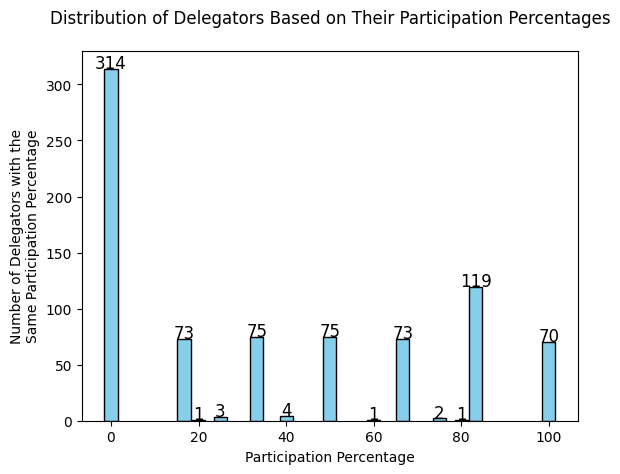

In [245]:
unique_percentages, counts = np.unique(participation_list, return_counts=True)

# Plot the bar chart with exact percentages
plt.bar(unique_percentages, counts, color='skyblue', edgecolor='black', width=3)

# Add labels and title
plt.xlabel("Participation Percentage")
plt.ylabel("Number of Delegators with the\nSame Participation Percentage")
# Add a title to the chart
plt.title("Distribution of Delegators Based on Their Participation Percentages", fontsize=12, pad=20)


# Show percentage labels on top of the bars
for i in range(len(unique_percentages)):
    plt.text(unique_percentages[i], counts[i] + 0.5, str(counts[i]), ha='center', fontsize=12)

# Save the plot to a PDF
plt.savefig("participation_distribution.pdf")

# Display the plot
plt.show()

In [246]:
#load csv to df
df = pd.read_csv('./data/Master - CRM MVP_ Top 100 Cardano DReps _ Trend Update Version - Weekly - WORKING VERSION.csv')

# create df from column 2 and column 3, 4
columns_index=[2, 3, 4,7,9]
for i in range(15,207,8):
    columns_index.append(i)
    columns_index.append(i+2)
df = df.iloc[:, columns_index]

df.columns.values[0] = 'DRep'
df.columns.values[1] = 'October 21, 2024'

for i in range(2, len(df.columns),2):
    df.columns.values[i] = df.columns.values[i-1]

for i in range(1, len(df.columns), 1):
    df.columns.values[i] = df.columns.values[i] + ' - Delegators' if i%2==1 else df.columns.values[i] + ' - Delegation'
# remove the first row
df = df.iloc[1:]
df= pd.melt(df, id_vars=['DRep'], var_name='Date', value_name='Value')
# Suppose df is your DataFrame and it has a column called 'Date'
df[['Date', 'Metric']] = df['Date'].str.split(' - ', expand=True)

#replace . with , for the date
df['Date'] = df['Date'].str.replace('.', ',')
# set Date as datetime while is Month day, year

df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%B %d, %Y')




df


,DRep,Date,Value,Metric
0,Always Abstain,2024-10-21,"5,164",Delegators
1,Yuta,2024-10-21,55,Delegators
2,EMURGO,2024-10-21,NaN,Delegators
3,Eternl DRep Committee,2024-10-21,"1,172",Delegators
4,blockdaemon,2024-10-21,NaN,Delegators
...,...,...,...,...
9459,-,2025-04-28,NaN,Delegation
9460,-,2025-04-28,NaN,Delegation
9461,LALKUL,2025-04-28,NaN,Delegation
9462,-,2025-04-28,NaN,Delegation


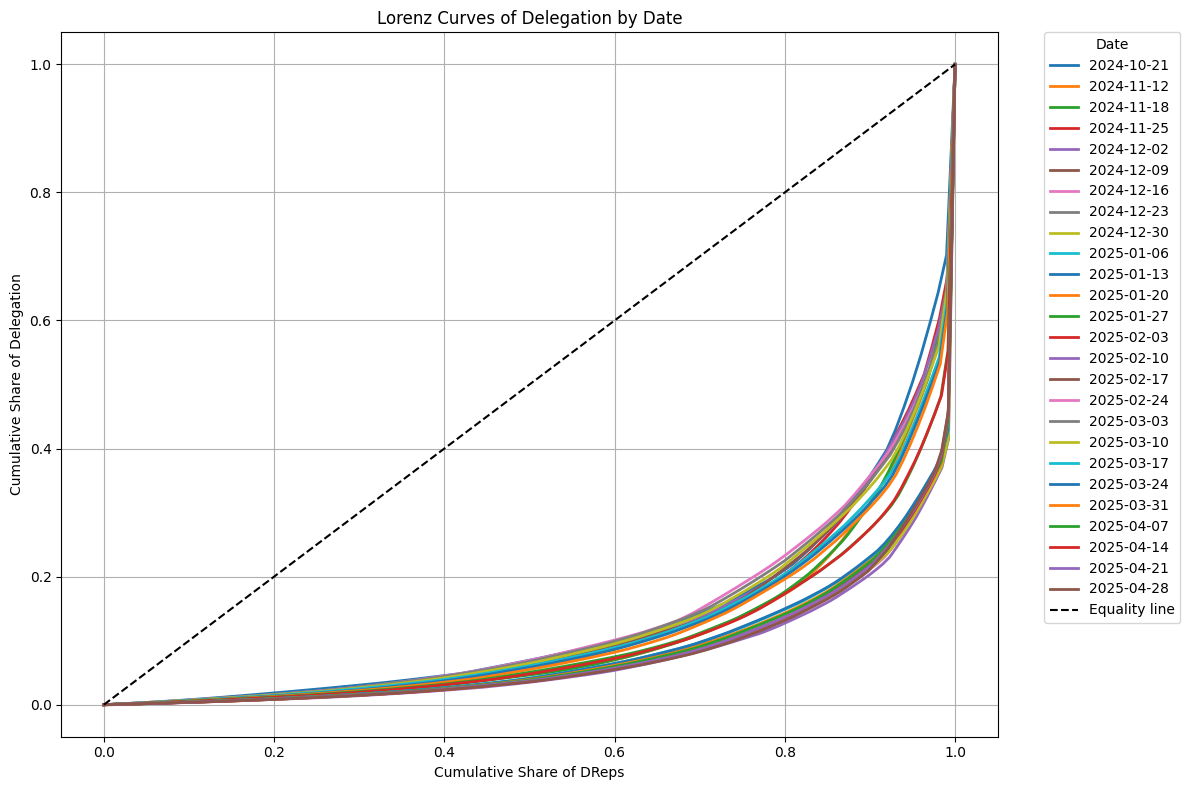

In [247]:
# Step 1: Clean 'Value' column (remove commas and convert to float)
df['Value'] = df['Value'].str.replace(',', '')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Step 2: Filter for 'Delegation' metric only
delegation_df = df[df['Metric'] == 'Delegation'].dropna(subset=['Value'])

# Step 3: Define Lorenz curve function
def lorenz_curve(values):
    values = np.sort(values)
    cumulative = np.cumsum(values)
    cumulative = np.insert(cumulative, 0, 0)
    cumulative = cumulative / cumulative[-1]
    x = np.linspace(0, 1, len(cumulative))
    return x, cumulative

plt.figure(figsize=(12, 8))  # Wider figure for room

for date, group in delegation_df.groupby('Date'):
    x, y = lorenz_curve(group['Value'].values)
    plt.plot(x, y, label=str(date.date()), linewidth=2)
    

plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Equality line')
plt.title('Lorenz Curves of Delegation by Date')
plt.xlabel('Cumulative Share of DReps')
plt.ylabel('Cumulative Share of Delegation')

# 🔄 Move legend outside the plot
plt.legend(
    title='Date',
    bbox_to_anchor=(1.05, 1),  # Push to the right
    loc='upper left',
    borderaxespad=0.
)

plt.grid(True)
plt.tight_layout()
plt.savefig("lorenz_curve_delegation_by_date.pdf")
plt.show()


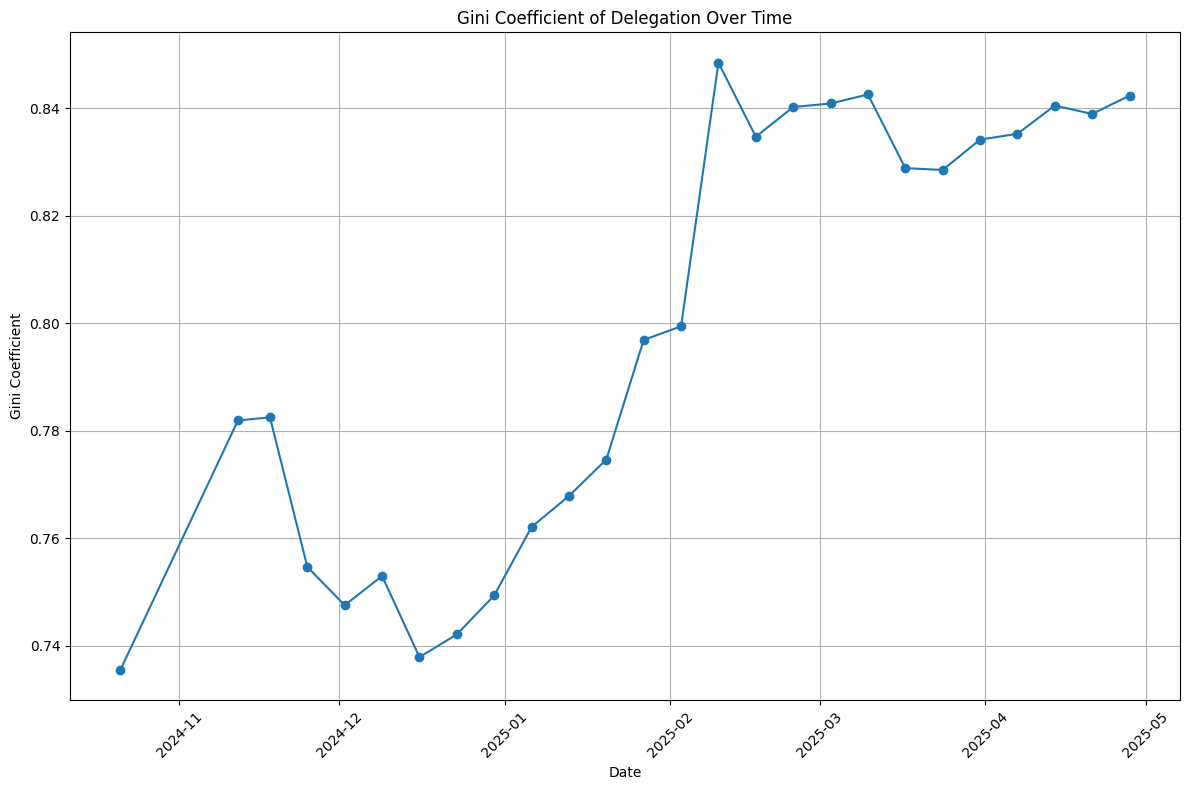

In [273]:
# 2. Filter for Delegation metric
delegation_df = df[df['Metric'] == 'Delegation'].dropna(subset=['Value'])

# 3. Gini coefficient function
def gini(array):
    if len(array) == 0:
        return np.nan
    array = np.sort(np.array(array))
    n = len(array)
    cumvals = np.cumsum(array)
    gini_coef = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coef

# 4. Calculate Gini per Date
gini_by_date = (
    delegation_df.groupby('Date')['Value']
    .apply(gini)
    .reset_index()
    .sort_values('Date')  # Sort by time
)

# 5. Plot
plt.figure(figsize=(12, 8))
plt.plot(gini_by_date['Date'], gini_by_date['Value'], marker='o')
plt.title('Gini Coefficient of Delegation Over Time')
plt.xlabel('Date')
plt.ylabel('Gini Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('gini_coefficient_delegation.pdf')

plt.show()
#save to pdf


In [274]:
delegation_df =delegation_df.sort_values(by=['DRep', 'Date'])
delegation_df["DRep"] = delegation_df["DRep"].str.replace(' ', '')
delegation_df = delegation_df[delegation_df['DRep'] != '-']

delegation_df['Change'] = delegation_df.groupby('DRep')['Value'].pct_change() * 100


delegation_df
            



,DRep,Date,Value,Metric,Change
4281,1JPN,2025-01-20,4.28,Delegation,NaN
4645,1JPN,2025-01-27,4.32,Delegation,0.934579
5009,1JPN,2025-02-03,6.35,Delegation,46.990741
5373,1JPN,2025-02-10,6.85,Delegation,7.874016
5737,1JPN,2025-02-17,6.84,Delegation,-0.145985
...,...,...,...,...,...
7870,忠実,2025-03-31,23.23,Delegation,-7.413312
8234,忠実,2025-04-07,23.24,Delegation,0.043048
8598,忠実,2025-04-14,23.25,Delegation,0.043029
8962,忠実,2025-04-21,23.27,Delegation,0.086022


In [275]:
# Calculate total delegation per date
total_per_date = delegation_df.groupby('Date')['Value'].sum().rename('Total')

# Merge it back into the original DataFrame
delegation_df = delegation_df.merge(total_per_date, on='Date')

# check if total is zero 
delegation_df['Total'] = delegation_df['Total'].replace(0, np.nan)
# Calculate percentage of total delegation
delegation_df['Percentage of Total'] = (delegation_df['Value'] / delegation_df['Total']) * 100



In [276]:
# add column of Value Change
delegation_df['Value Change'] = delegation_df.groupby('DRep')['Value'].diff()
delegation_df['Total Change'] = delegation_df.groupby('DRep')['Total'].diff()
# add column of Percentage Change
delegation_df['Weight Change From Total'] = (delegation_df['Value Change'] / delegation_df['Total Change']) * 100
delegation_df

,DRep,Date,Value,Metric,Change,Total,Percentage of Total,Value Change,Total Change,Weight Change From Total
0,1JPN,2025-01-20,4.28,Delegation,NaN,4633.91,0.092363,NaN,NaN,NaN
1,1JPN,2025-01-27,4.32,Delegation,0.934579,5331.31,0.081031,0.04,697.40,0.005736
2,1JPN,2025-02-03,6.35,Delegation,46.990741,5782.12,0.109821,2.03,450.81,0.450301
3,1JPN,2025-02-10,6.85,Delegation,7.874016,8353.16,0.082005,0.50,2571.04,0.019447
4,1JPN,2025-02-17,6.84,Delegation,-0.145985,8567.72,0.079835,-0.01,214.56,-0.004661
...,...,...,...,...,...,...,...,...,...,...
2880,忠実,2025-03-31,23.23,Delegation,-7.413312,9980.98,0.232743,-1.86,426.17,-0.436446
2881,忠実,2025-04-07,23.24,Delegation,0.043048,10096.18,0.230186,0.01,115.20,0.008681
2882,忠実,2025-04-14,23.25,Delegation,0.043029,10436.71,0.222771,0.01,340.53,0.002937
2883,忠実,2025-04-21,23.27,Delegation,0.086022,10487.99,0.221873,0.02,51.28,0.039002


/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_6610/733409010.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


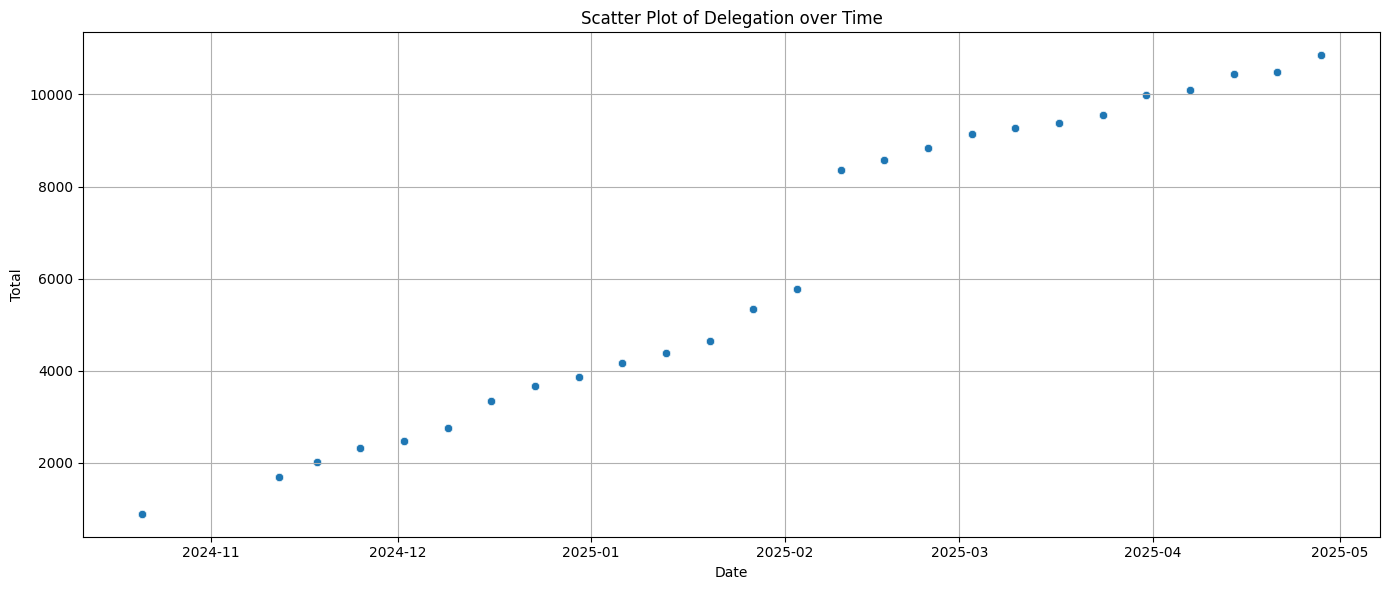

In [277]:

data = delegation_df.drop_duplicates(subset=['Date', 'Total','DRep'])
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='Date', y='Total')
plt.title('Scatter Plot of Delegation over Time')
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.savefig('scatter_plot_delegation.pdf')
plt.show()

In [278]:
delegators_df = df[df['Metric'] == 'Delegators'].dropna(subset=['Value'])
delegators_df =delegators_df.sort_values(by=['DRep', 'Date'])
delegators_df["DRep"] = delegators_df["DRep"].str.replace(' ', '')
delegators_df = delegators_df[delegators_df['DRep'] != '-']
total_per_date = delegators_df.groupby('Date')['Value'].sum().rename('Total')
delegators_df = delegators_df.merge(total_per_date, on='Date')
delegators_df

,DRep,Date,Value,Metric,Total
0,1JPN,2025-01-20,13.0,Delegators,88649.0
1,1JPN,2025-01-27,14.0,Delegators,92242.0
2,1JPN,2025-02-03,16.0,Delegators,97034.0
3,1JPN,2025-02-10,18.0,Delegators,100679.0
4,1JPN,2025-02-17,19.0,Delegators,105110.0
...,...,...,...,...,...
2880,忠実,2025-03-31,4.0,Delegators,122491.0
2881,忠実,2025-04-07,4.0,Delegators,125015.0
2882,忠実,2025-04-14,4.0,Delegators,127854.0
2883,忠実,2025-04-21,4.0,Delegators,130457.0


/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_6610/1441652035.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


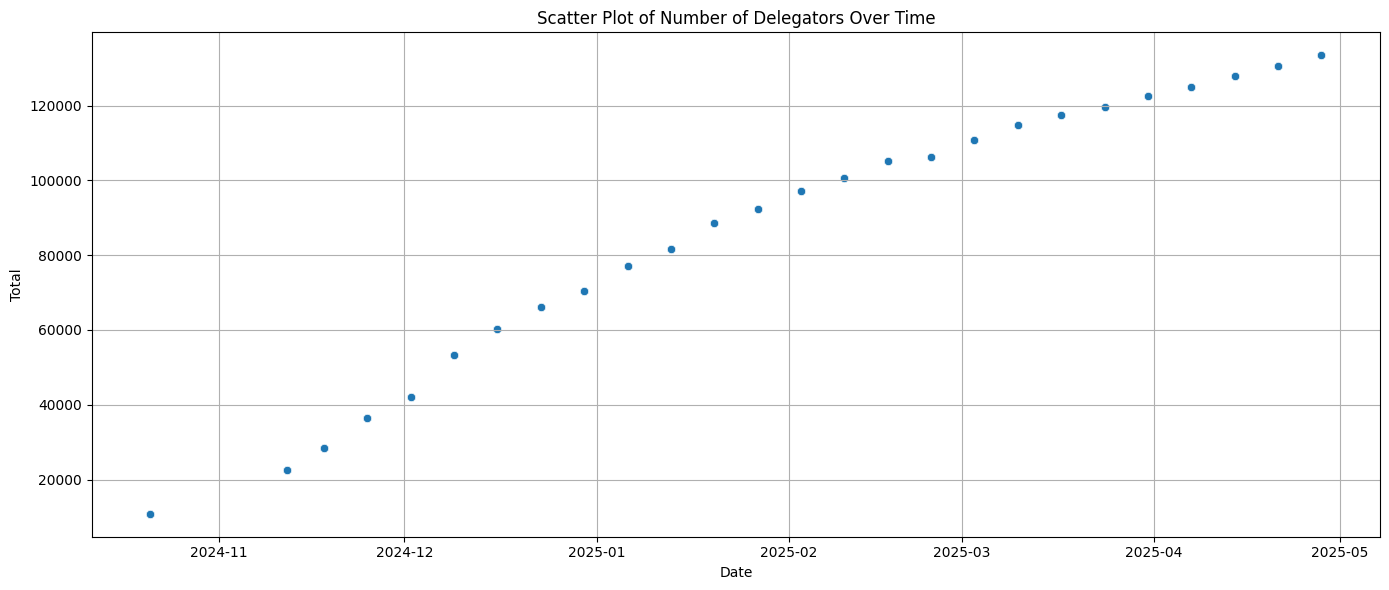

In [279]:
data = delegators_df.drop_duplicates(subset=['Date', 'Total','DRep'])
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='Date', y='Total')
plt.title('Scatter Plot of Number of Delegators Over Time')
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.savefig('scatter_plot_delegators.pdf')
plt.show()

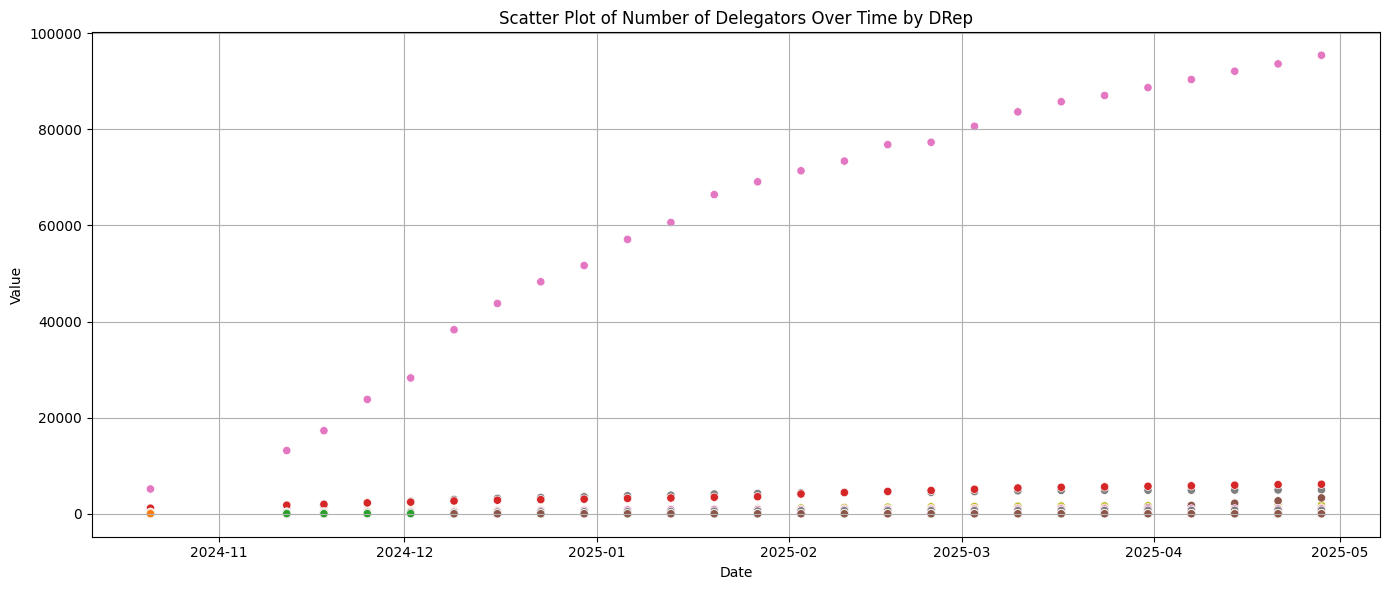

In [280]:
# plot graph scatter plot of delegation over time for each drep
plt.figure(figsize=(14, 6))
sns.scatterplot(data=delegators_df, x='Date', y='Value', hue='DRep', palette='tab10')
plt.title('Scatter Plot of Number of Delegators Over Time by DRep')
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.savefig('scatter_plot_delegators_by_drep.pdf')
plt.show()

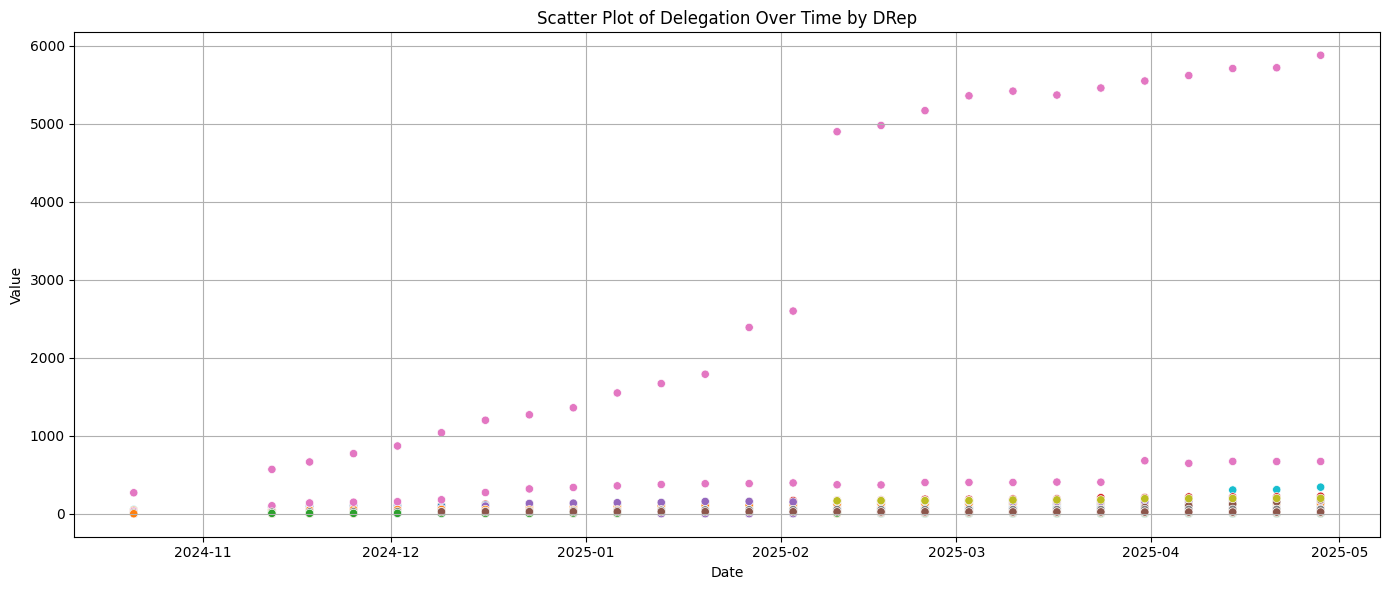

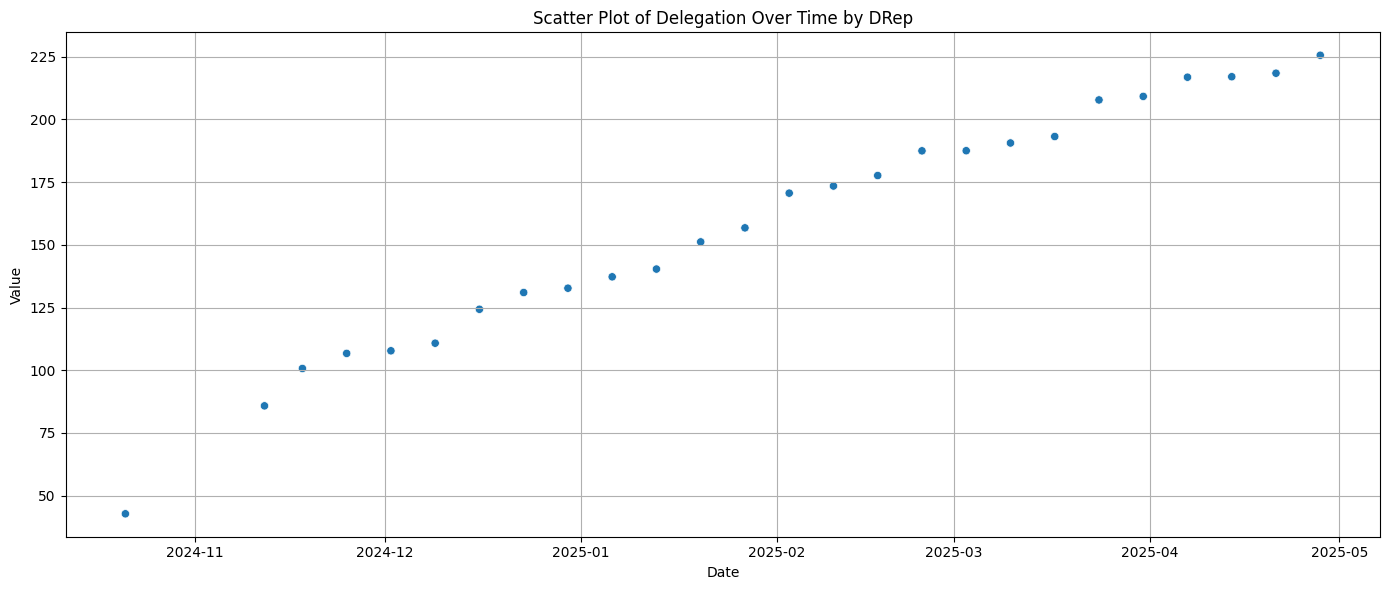

['1JPN' '42' 'ABBA---withGoodMusictoSuccess!!!' 'ACLCardanoLandSPO'
 'ADAOceanSPO' 'ADALovelacePool' 'AF' 'AKYO' 'AQUA_Vote(AuraPool)'
 'ATLAS_Wolfgang-SPO' 'AdaStat' 'Ada_LaboJapan' 'AdapolisStakepool'
 'Aichi/Tokai_DRep' 'Alex(BKVPool)' 'AlfredMoesker' 'AlwaysAbstain'
 'Alwaysnoconfidence' 'AnastasiaLabs' 'AnonymousFreeman' 'ArmyofSpies'
 'ArrakisPool' 'Astroboysoup' 'AxtraLabs' 'BLESSSPO' 'BTBF_XSP'
 'BWtakeJapan' 'Bamboo_Drep' 'BigLazyCat' 'BullishDumpling' 'CAMP'
 'CHILStakePool' 'CTECStakePool' 'Cardanians' 'Cardanistas'
 'CardanoEthicalOversight(CEO)' 'CardanoFoundation'
 'CardanoWhale(adawhale)' 'CardanoYoda' 'Cerkoryn'
 'Chikara(MOBCStakePool)' 'ChrisCata' 'ChrisGianelloni(BlinkLabs)'
 'ChrisO' 'Chris[STR8]-Straightpool' 'ClarityCofounderdRep' 'CleanEyes'
 'CoinCeylon' 'CryptoCrow' 'DINO' 'Daehan_kor' 'Dave'
 'DecentralizedFuture' 'DmitriiGartung' 'Donin' 'DraculaDAO'
 'DrepOne(MarekMahut)' 'DucTigerStakePool' 'EDENGardenPool' 'EMURGO'
 'EarnCoinPool' 'ElRaulito(SmartDRep)' 'E

In [310]:
#plot graph scatter plot of delegation over time for each drep
plt.figure(figsize=(14, 6))
sns.scatterplot(data=delegation_df, x='Date', y='Value', hue='DRep', palette='tab10')
plt.title('Scatter Plot of Delegation Over Time by DRep')
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.savefig('scatter_plot_delegation_by_drep.pdf')
plt.show()
plt.figure(figsize=(14, 6))
sns.scatterplot(data=delegation_df[delegation_df["DRep"]=="EternlDRepCommittee"], x='Date', y='Value', hue='DRep', palette='tab10')
plt.title('Scatter Plot of Delegation Over Time by DRep')
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.savefig('scatter_plot_delegation_by_drep.pdf')
plt.show()
print(delegation_df["DRep"].unique())

Negative Change
0    2269
1     616
Name: count, dtype: int64


/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_6610/3116888402.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


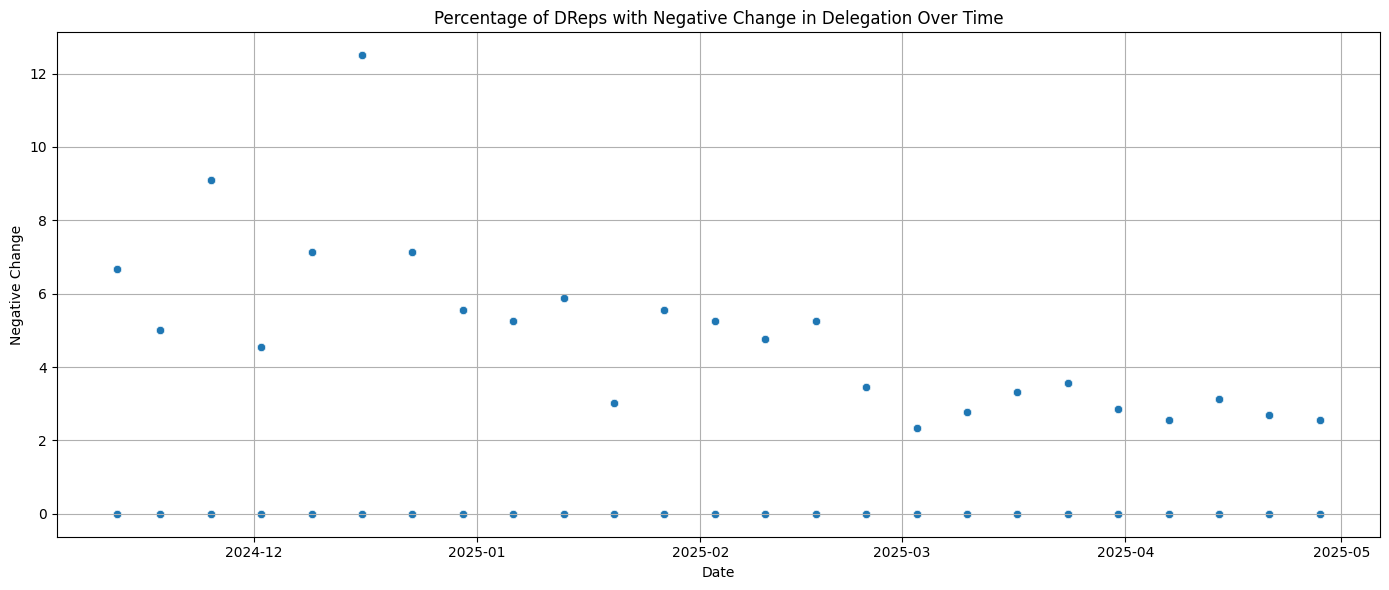

In [282]:
# plot graph of precantage of Drep with negative change of delegation over time
delegation_df['Negative Change'] = delegation_df['Change'] < 0
delegation_df['Negative Change'] = delegation_df['Negative Change'].astype(int)
print(delegation_df['Negative Change'].value_counts())

delegation_df['Negative Change'] = delegation_df.groupby('Date')['Negative Change'].transform(lambda x: x / x.sum() * 100)
# remove ones with 0 or Nan change
# delegation_df = delegation_df[delegation_df['Negative Change'] != 0]
plt.figure(figsize=(14, 6))
sns.scatterplot(data=delegation_df, x='Date', y='Negative Change')
plt.title('Percentage of DReps with Negative Change in Delegation Over Time')
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.savefig('percentage_negative_change_delegation.pdf')
plt.show()

                       DRep  Negative Change Count  Number of Dates  \
0       DecentralizedFuture                     15               21   
108                  LongHồ                      2                3   
12          LongShortSignal                      8               13   
4             CTECStakePool                     10               20   
115           Alex(BKVPool)                      1                2   
96   Chikara(MOBCStakePool)                      2                4   
118                    CAMP                      1                2   
2                    Holger                     12               26   
1            MicahAlexKenda                     12               26   
3                  KTOPPool                     12               26   

     Percentage of Negative Change  
0                        71.428571  
108                      66.666667  
12                       61.538462  
4                        50.000000  
115                      50.00000

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_6610/1643830263.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negative_change_counts, x='DRep', y='Percentage of Negative Change', palette='viridis')
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_6610/1643830263.py:20: UserWarning: Glyph 24544 (\N{CJK UNIFIED IDEOGRAPH-5FE0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_6610/1643830263.py:20: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_6610/1643830263.py:21: UserWarning: Glyph 24544 (\N{CJK UNIFIED IDEOGRAPH-5FE0}) missing from font(s) DejaVu Sans.
  plt.savefig('percentage_negative_change_delegation_by_drep.pdf

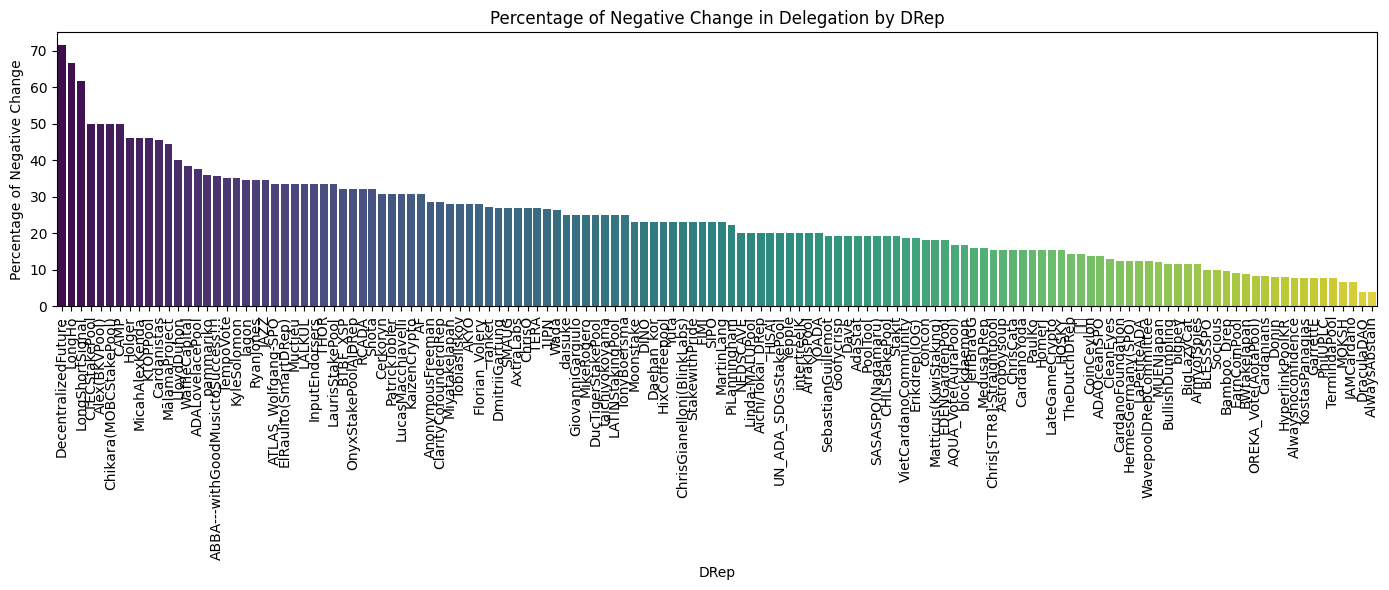

In [295]:
# count number of negative change dates by drep 
negative_change_counts = delegation_df[delegation_df['Negative Change'] > 0].groupby('DRep').size().reset_index(name='Negative Change Count')
# sort 
negative_change_counts = negative_change_counts.sort_values(by='Negative Change Count', ascending=False)
# add column of percentage of negative change compare to positive change
negative_change_counts = pd.merge(negative_change_counts, delegation_df.groupby('DRep').size().reset_index(name='Number of Dates'), on='DRep')
negative_change_counts['Percentage of Negative Change'] = (negative_change_counts['Negative Change Count'] / negative_change_counts['Number of Dates']) * 100
# sort by percentage of negative change
negative_change_counts = negative_change_counts.sort_values(by='Percentage of Negative Change', ascending=False)

print(negative_change_counts.head(10))

# plot 
plt.figure(figsize=(14, 6))
sns.barplot(data=negative_change_counts, x='DRep', y='Percentage of Negative Change', palette='viridis')
plt.title('Percentage of Negative Change in Delegation by DRep')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Negative Change')
plt.xlabel('DRep')
plt.tight_layout()
plt.savefig('percentage_negative_change_delegation_by_drep.pdf')



In [285]:
print(delegation_df.head(10))

   DRep       Date  Value      Metric     Change    Total  \
0  1JPN 2025-01-20   4.28  Delegation        NaN  4633.91   
1  1JPN 2025-01-27   4.32  Delegation   0.934579  5331.31   
2  1JPN 2025-02-03   6.35  Delegation  46.990741  5782.12   
3  1JPN 2025-02-10   6.85  Delegation   7.874016  8353.16   
4  1JPN 2025-02-17   6.84  Delegation  -0.145985  8567.72   
5  1JPN 2025-02-24   7.13  Delegation   4.239766  8833.54   
6  1JPN 2025-03-03   7.27  Delegation   1.963534  9150.62   
7  1JPN 2025-03-10   6.73  Delegation  -7.427785  9262.75   
8  1JPN 2025-03-17   5.38  Delegation -20.059435  9373.15   
9  1JPN 2025-03-24   5.38  Delegation   0.000000  9554.81   

   Percentage of Total  Value Change  Total Change  Weight Change From Total  \
0             0.092363           NaN           NaN                       NaN   
1             0.081031          0.04        697.40                  0.005736   
2             0.109821          2.03        450.81                  0.450301   
3       

In [284]:
# set column 'Change that is the precatnage change of delegators 'Value' from date to date which is from row to row of drep



# plot graph of precantage of Drep with negative change of delegators over time
delegators_df['Negative Change'] = delegators_df['Change'] < 0
delegators_df['Negative Change'] = delegators_df['Negative Change'].astype(int)
delegators_df['Negative Change'] = delegators_df.groupby('Date')['Negative Change'].transform(lambda x: x / x.sum() * 100)
print(delegators_df.head())
# remove ones with 0 or Nan change
delegation_df = delegators_df[delegators_df['Negative Change'] != 0]
plt.figure(figsize=(14, 6))
sns.scatterplot(data=delegation_df, x='Date', y='Negative Change')
plt.title('Percentage of DReps with Negative Change in Delegation Over Time')
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.savefig('percentage_negative_change_delegators.pdf')
plt.show()

KeyError: 'Change'

In [ ]:
def solution(S, C):
    table = S.split('\n')
    table = [row.split(',') for row in table]
    column_index = table[0].index(C)
    max_value = 0
    for row in table[1:]:
        if row[column_index] != '':
            max_value = max(max_value, float(row[column_index]))
    print(max_value)

    
# try the function
solution("DRep,October 21 2024\n1,2\n3,4", "DRep")

3.0


In [ ]:
def solution(client):
    max_shelf_size = client[0]-1
    max_number = client[0]
    removed_from_shelf = 1
    for i,elm in enumerate(client):
        if i == 0:
            continue
        if elm < max_number:
            removed_from_shelf+=1
            continue
        if elm > max_number:
            max_shelf_size = max(elm-removed_from_shelf-1,max_shelf_size)
            removed_from_shelf+=1
            max_number = elm
    return max_shelf_size
            
solution([1,2,3,4,5])
solution([3,2,4,5,1])
solution([3,2,7,5,4,1,6])

def max_shelf_size(packages):
    shelf = set()
    expected = 1
    max_shelf = 0
    
    for p in packages:
        if p == expected:
            expected += 1
            while expected in shelf:
                shelf.remove(expected)
                expected += 1
        else:
            shelf.add(p)
        max_shelf = max(max_shelf, len(shelf))
    
    return max_shelf

# try the function
print(max_shelf_size([2, 1, 4, 3]))  # Output: 1
# Explanation: Package 2 goes to shelf first, then 1 arrives and delivered, then 2 from shelf delivered.

print(max_shelf_size([3, 2, 1, 4, 5]))  # Output: 2
# Explanation: Packages 3 and 2 go to shelf before package 1 arrives.

print(max_shelf_size([1, 2, 3, 4, 5]))  # Output: 0
# Explanation: Packages arrive in order, no shelf needed.

print(max_shelf_size([5, 4, 3, 2, 1]))  # Output: 4
# Explanation: Packages 5,4,3,2 all go to shelf waiting for 1.

print(max_shelf_size([1, 3, 2, 5, 4]))  # Output: 1
# Explanation: Package 1 delivered, 3 goes to shelf, then 2 delivered, then 3 from shelf delivered.

print(max_shelf_size([2, 4, 3, 1, 5]))  # Output: 2
# Explanation: 2 and 4 on shelf, 3 arrives goes to shelf, 1 delivered then 2,3,4 from shelf delivered.

print(max_shelf_size([1]))  # Output: 0
# Explanation: Only one package, no shelf needed.

# Explanation: No packages.

print(max_shelf_size([2, 3, 4, 5, 1]))  # Output: 4
# Explanation: 2,3,4,5 go on shelf waiting for 1.

print(max_shelf_size([1, 2, 4, 3, 5]))  # Output: 1
# Explanation: 1 and 2 delivered, 4 on shelf, 3 delivered then 4 from shelf.
print("solution")
# Now your solution (replace 'solution' with your function name)
print(solution([2, 1, 4, 3]))  # Expected: 1
print(solution([3, 2, 1, 4, 5]))  # Expected: 2
print(solution([1, 2, 3, 4, 5]))  # Expected: 0
print(solution([5, 4, 3, 2, 1]))  # Expected: 4
print(solution([1, 3, 2, 5, 4]))  # Expected: 1
print(solution([2, 4, 3, 1, 5]))  # Expected: 2
print(solution([1]))  # Expected: 0
print(solution([2, 3, 4, 5, 1]))  # Expected: 4
print(solution([1, 2, 4, 3, 5]))  # Expected: 1
    

                
        



1
2
0
4
1
3
0
4
1
solution
1
2
0
4
1
2
0
1
1


In [ ]:
from extratypes import Results 

RANK_ORDER = '23456789TJQKA'

def normalize_card(card):
    rank = card[:-1]
    suit = card[-1]
    if rank == "10":
        rank = "T"
    return (rank, suit, card)

def parse_cards(cards):
    return [normalize_card(card) for card in cards]

def build_maps(parsed):
    rank_count = {}
    suit_count = {}
    rank_to_cards = {}
    suit_to_cards = {}
    for r, s, c in parsed:
        rank_count[r] = rank_count.get(r, 0) + 1
        suit_count[s] = suit_count.get(s, 0) + 1
        rank_to_cards.setdefault(r, []).append(c)
        suit_to_cards.setdefault(s, []).append(c)
    return rank_count, suit_count, rank_to_cards, suit_to_cards

def format_cards(cards):
    return [c.replace("T", "10") for c in cards]

def find_full_house(rank_count, rank_to_cards):
    triple, pair = None, None
    for r in RANK_ORDER[::-1]:
        if rank_count.get(r, 0) >= 3 and triple is None:
            triple = r
        elif rank_count.get(r, 0) >= 2 and r != triple and pair is None:
            pair = r
    if triple and pair:
        cards = rank_to_cards[triple][:3] + rank_to_cards[pair][:2]
        return Results(set_name="a triple and a pair", selected_cards=cards)

    return None

def find_flush(suit_to_cards):
    for suit in suit_to_cards:
        if len(suit_to_cards[suit]) >= 5:
            cards = suit_to_cards[suit][:5]
            return Results(set_name="suit", selected_cards=cards)
    return None

def find_straight(parsed):
    seen = {}
    for r, s, c in parsed:
        if r not in seen:
            seen[r] = c
    ranks = sorted([RANK_ORDER.index(r) for r in seen],reverse=True)
    for i in range(len(ranks) - 4):
        if ranks[i+4] - ranks[i] == 4:
            target_ranks = {RANK_ORDER[ranks[j]] for j in range(i, i+5)}
            cards = [seen[r] for r in target_ranks]
            return Results(set_name="five in a row", selected_cards=cards)
    return None
def find_straight(parsed):
    rank_to_card = {}
    for r, s, c in parsed:
        if r not in rank_to_card or RANK_ORDER.index(c[0]) > RANK_ORDER.index(rank_to_card[r][0]):
            rank_to_card[r] = c

    unique_ranks = sorted([RANK_ORDER.index(r) for r in rank_to_card], reverse=True)

    for i in range(len(unique_ranks) - 4 + 1):
        # Try to build a straight sequence
        straight_ranks = [unique_ranks[i] - j for j in range(5)]
        if all(rank in unique_ranks for rank in straight_ranks):
            straight_cards = []
            for rank_index in sorted(straight_ranks):
                r = RANK_ORDER[rank_index]
                straight_cards.append(rank_to_card[r])
            return "five in a row", format_cards(straight_cards)
    return None
def find_triple(rank_count, rank_to_cards):
    for r in RANK_ORDER[::-1]:
        if rank_count.get(r, 0) >= 3:
            cards = rank_to_cards[r][:3]
            return Results(set_name="triple", selected_cards=cards)
    return None

def find_pair(rank_count, rank_to_cards):
    for r in RANK_ORDER[::-1]:
        if rank_count.get(r, 0) >= 2:
            cards = rank_to_cards[r][:2]
            return Results(set_name="pair", selected_cards=cards)
    return None

def find_single(parsed):
    best = max(parsed, key=lambda x: RANK_ORDER.index(x[0]))
    return Results(set_name="single", selected_cards=cards)

def solution(cards):
    parsed = parse_cards(cards)
    rank_count, suit_count, rank_to_cards, suit_to_cards = build_maps(parsed)

    result = find_full_house(rank_count, rank_to_cards)
    if result: return result

    result = find_flush(suit_to_cards)
    if result: return result

    result = find_straight(parsed)
    if result: return result

    result = find_triple(rank_count, rank_to_cards)
    if result: return result

    result = find_pair(rank_count, rank_to_cards)
    if result: return result

    return find_single(parsed)


cards = ['10D', '10H', '10C', '2S', '2H', '2D', 'JH', 'JC']
# hand_name, hand_cards = solution(cards)
print(solution(cards))
# print(hand_name)
# print(hand_cards)

    

ModuleNotFoundError: No module named 'extratypes'